# Oil & Gas Engineering Dataset Processing

## 1. Import Libraries

In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

## 2. Load Dataset

In [2]:
# Load the HuggingFace dataset (train split)
dataset = load_dataset("GainEnergy/oilandgas-engineering-dataset", split="train")

# Convert to pandas DataFrame
df = pd.DataFrame(dataset)


## 3. Initial Dataset Exploration

In [3]:
# Show general info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    453 non-null    object
 1   label   453 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
# Show column names
print(df.columns)


Index(['text', 'label'], dtype='object')


In [5]:
# Show first 5 rows
print(df.head())

                                                text  label
0  Determine the optimal well spacing for a newly...      1
1  The petrophysical properties of the unconsolid...      1
2  A dynamic reservoir model is being used to sim...      1
3  A petroleum company is considering the develop...      0
4  What are the implications of non-Darcy flow on...      1


## 4. Column Normalization

In [6]:
# Create a normalized list of column names
new_cols = []
used = {}

for col in df.columns:
    # Lowercase, strip, replace non-alphanumeric characters with "_"
    name = str(col).strip().lower()
    name = re.sub(r"\W+", "_", name)
    name = re.sub(r"_+", "_", name)
    name = name.strip("_") or "col"

    # Ensure unique column names
    if name in used:
        used[name] += 1
        name = f"{name}_{used[name]}"
    else:
        used[name] = 0

    new_cols.append(name)

df.columns = new_cols

print("Normalized columns:", df.columns)


Normalized columns: Index(['text', 'label'], dtype='object')


## 5. Basic Text Cleaning

In [7]:
# Trim whitespace in the 'text' column
df['text'] = df['text'].astype(str).str.strip()

# Check first 5 rows
print(df.head())


                                                text  label
0  Determine the optimal well spacing for a newly...      1
1  The petrophysical properties of the unconsolid...      1
2  A dynamic reservoir model is being used to sim...      1
3  A petroleum company is considering the develop...      0
4  What are the implications of non-Darcy flow on...      1


In [8]:
# Display options
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_colwidth", 200)

# Preview function
def preview(df, n=5, text_len=200):
    for _, row in df.sample(n, random_state=42).iterrows():
        print(f"Label: {row['label']}\nText: {row['text'][:text_len]}{'...' if len(row['text'])>text_len else ''}\n{'-'*80}")

# Usage
preview(df)


Label: 1
Text: Derive the volumetric sweep efficiency equation for a waterflooding operation in a homogeneous reservoir, assuming a uniform injection rate and a constant reservoir porosity of 0.25. The reservoir has...
--------------------------------------------------------------------------------
Label: 4
Text: Design a sweet spot for a gas processing plant in a harsh arctic environment, considering the effects of permafrost, high winds, and low temperatures on equipment selection, layout, and maintenance. T...
--------------------------------------------------------------------------------
Label: 4
Text: Design a natural gas processing facility to separate and treat 100 MMSCFD of rich gas feed, considering API 614 standards for mechanical seal design and ASME B31.3 for piping codes. The facility shoul...
--------------------------------------------------------------------------------
Label: 2
Text: Design a well intervention plan for a horizontal oil well with a total depth of 10,00

## 6. Handle Missing Data

In [9]:
# Drop rows where all columns are missing
df = df.dropna(axis=0, how="all")

# Check shape after dropping
print("Number of rows after dropping empty rows:", df.shape[0])


Number of rows after dropping empty rows: 453


That means no rows were empty, so our DataFrame is fully clean and ready for further processing. ✅

In [ ]:
# Drop rows with empty or very short text
df = df[df['clean_text'].str.len() > 10]

## 7. Save Cleaned Dataset

In [10]:
# Save as Excel file
df.to_excel("cleaned_oilgas_dataset.xlsx", index=False)

print("Dataset saved successfully as Excel!")


Dataset saved successfully as Excel!


## 8. Exploratory Data Analysis (EDA)

### 8.1 Quick statistics on labels

In [11]:
# Count of each label
label_counts = df['label'].value_counts()
print("Label distribution:\n", label_counts)


Label distribution:
 label
1    182
6     77
3     67
4     41
0     38
2     37
5     11
Name: count, dtype: int64


### 8.2 Check text lengths

In [12]:
# Add a column for text length
df['text_length'] = df['text'].apply(len)

# Quick stats
print(df['text_length'].describe())


count     453.000000
mean      345.973510
std       156.435797
min        94.000000
25%       237.000000
50%       300.000000
75%       419.000000
max      1090.000000
Name: text_length, dtype: float64


This gives you an idea of the range of text lengths, useful before NLP processing.

### 8.3 Preview random samples

In [13]:
# Preview 5 random samples with truncated text
for idx, row in df.sample(5, random_state=42).iterrows():
    print(f"Index: {idx}")
    print(f"Label: {row['label']}")
    print(f"Text: {row['text'][:200]}")  # show first 200 chars
    print("-" * 80)


Index: 352
Label: 1
Text: Derive the volumetric sweep efficiency equation for a waterflooding operation in a homogeneous reservoir, assuming a uniform injection rate and a constant reservoir porosity of 0.25. The reservoir has
--------------------------------------------------------------------------------
Index: 39
Label: 4
Text: Design a sweet spot for a gas processing plant in a harsh arctic environment, considering the effects of permafrost, high winds, and low temperatures on equipment selection, layout, and maintenance. T
--------------------------------------------------------------------------------
Index: 361
Label: 4
Text: Design a natural gas processing facility to separate and treat 100 MMSCFD of rich gas feed, considering API 614 standards for mechanical seal design and ASME B31.3 for piping codes. The facility shoul
--------------------------------------------------------------------------------
Index: 358
Label: 2
Text: Design a well intervention plan for a horizontal oi

### 8.4 Basic Dataset Analysis

#### Label distribution

In [14]:
label_counts = df['label'].value_counts()
print("Label distribution:\n", label_counts)


Label distribution:
 label
1    182
6     77
3     67
4     41
0     38
2     37
5     11
Name: count, dtype: int64


#### Text length analysis

See the length of the text for each entry:

In [15]:
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())


count     453.000000
mean      345.973510
std       156.435797
min        94.000000
25%       237.000000
50%       300.000000
75%       419.000000
max      1090.000000
Name: text_length, dtype: float64


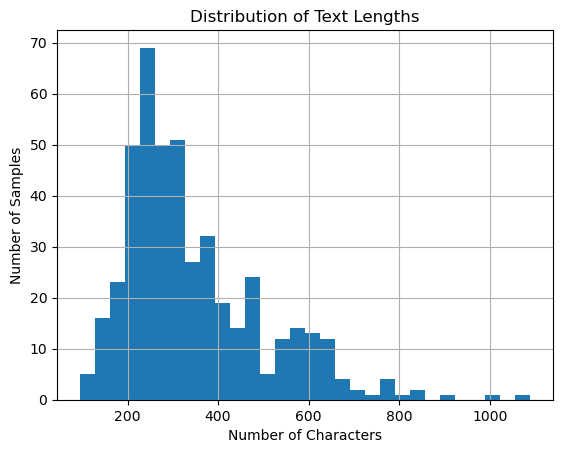

In [16]:
df['text_length'].hist(bins=30)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Samples")
plt.show()

## 9. Text Preprocessing

In [17]:
# Example: copy original text to a new column for processing
df['clean_text'] = df['text'].copy()

# 1. Lowercase
df['clean_text'] = df['clean_text'].str.lower()

# 2. Remove punctuation
df['clean_text'] = df['clean_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# 3. Remove extra whitespace
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# 4. Preview cleaned text
for _, row in df.sample(5, random_state=42).iterrows():
    print(f"Label: {row['label']}\nClean Text: {row['clean_text'][:200]}{'...' if len(row['clean_text'])>200 else ''}\n{'-'*80}")


Label: 1
Clean Text: derive the volumetric sweep efficiency equation for a waterflooding operation in a homogeneous reservoir assuming a uniform injection rate and a constant reservoir porosity of 025 the reservoir has an...
--------------------------------------------------------------------------------
Label: 4
Clean Text: design a sweet spot for a gas processing plant in a harsh arctic environment considering the effects of permafrost high winds and low temperatures on equipment selection layout and maintenance the pla...
--------------------------------------------------------------------------------
Label: 4
Clean Text: design a natural gas processing facility to separate and treat 100 mmscfd of rich gas feed considering api 614 standards for mechanical seal design and asme b313 for piping codes the facility should i...
--------------------------------------------------------------------------------
Label: 2
Clean Text: design a well intervention plan for a horizontal oil well wit

## 10. Notes on Numeric Data in Text

Numbers represent real oil & gas parameters and should not be removed unless needed.